In [69]:
from scipy import integrate
import numpy as np
import sympy as sym
import math as m
from scipy.interpolate import interp1d
from scipy import integrate
import matplotlib.pyplot as plt
#@matplotlib inline

r=np.load('r_for_W.npy') #ангстрем
W12_r=np.load('W_r.npy') #На
W21_r=np.load('W_r_2.npy')
W11_r=np.load('W_r_mos2.npy')
W22_r=np.load('W_r_wse2.npy')

In [70]:
from scipy.integrate import quad

#квадрат волновой функции
def wavefunc(x,aa):
    return 4*np.exp(-2*x/aa)/(aa**2*2*np.pi)

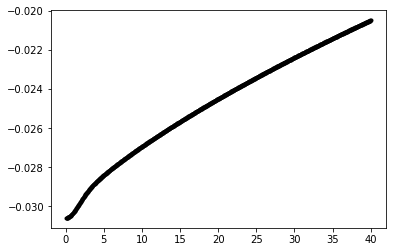

In [71]:
W12r = interp1d(r,W12_r,kind='linear')
plt.plot(r,W12r(r))
plt.plot(r,W12_r,'k.')

def integrand12(rr,a):
    return 27.21*rr*wavefunc(rr,a)*W12r(rr)
    
def V12(a):    
    return 2*np.pi*integrate.quad(integrand12, r[0], r[-1], args=(a,), limit=200)[0]

In [72]:
V12(3)

-0.7967510809217541

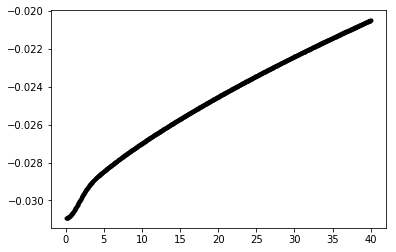

In [73]:
W21r = interp1d(r,W21_r,kind='linear')
plt.plot(r,W21r(r))
plt.plot(r,W21_r,'k.')

def integrand21(rr,a):
    return 27.21*rr*wavefunc(rr,a)*W21r(rr)
    
def V21(a):    
    return 2*np.pi*integrate.quad(integrand21, r[0], r[-1], args=(a,), limit=200)[0]

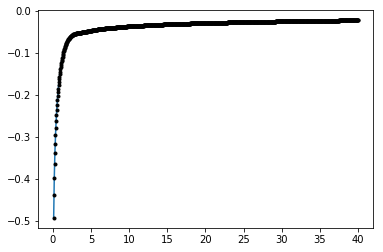

In [74]:
W11r = interp1d(r,W11_r,kind='linear')
plt.plot(r,W11r(r))
plt.plot(r,W11_r,'k.')

def integrand11(rr,a):
    return 27.21*rr*wavefunc(rr,a)*W11r(rr)
    
def V11(a):    
    return 2*np.pi*integrate.quad(integrand11, r[0], r[-1], args=(a,), limit=200)[0]

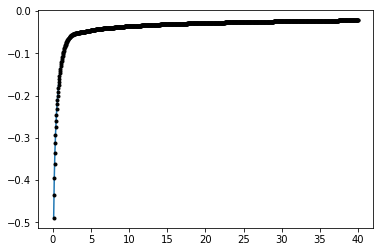

In [75]:
W22r = interp1d(r,W22_r,kind='linear')
plt.plot(r,W22r(r))
plt.plot(r,W22_r,'k.')

def integrand22(rr,a):
    return 27.21*rr*wavefunc(rr,a)*W22r(rr)
    
def V22(a):    
    return 2*np.pi*integrate.quad(integrand22, r[0], r[-1], args=(a,), limit=200)[0]

In [89]:
th=0.2341 #eV
te=0
Vek=0.31  #eV
Vhg=0.16
m0=9.1e-31 ### kg
hbar=1.05e-34 ### J s
JtoeV = 1./1.6e-19
m1e=0.55*m0
m1h=3.3*m0
m2e=0.48*m0
m2h=2.1*m0

mu11=m1e*m1h/(m1e+m1h)
mu12=m1e*m2h/(m1e+m2h)
mu21=m2e*m1h/(m2e+m1h)
mu22=m2e*m2h/(m2e+m2h)

def K11(a):
    ainm=a*1.e-10 ### A to m
    return JtoeV*hbar**2/(2*mu11*ainm**2)

def K12(a):
    ainm=a*1.e-10 ### A to m
    return JtoeV*hbar**2/(2*mu12*ainm**2)

def K21(a):
    ainm=a*1.e-10 ### A to m
    return JtoeV*hbar**2/(2*mu21*ainm**2)

def K22(a):
    ainm=a*1.e-10 ### A to m
    return JtoeV*hbar**2/(2*mu22*ainm**2)

In [130]:
@np.vectorize
def gs(a):
    H11=K11(a)+V11(a)+Vhg
    H12=K12(a)+V12(a)
    H21=K21(a)+V21(a)+Vek+Vhg
    H22=K22(a)+V22(a)+Vek
    H=np.array( [[H11, th, te, 0], [th, H12, 0, te], [te, 0, H21, th], [0, te, th, H22]] )
    gse = min(np.linalg.eigvals(H))
    return gse

In [131]:
a=np.linspace(1,20,100)

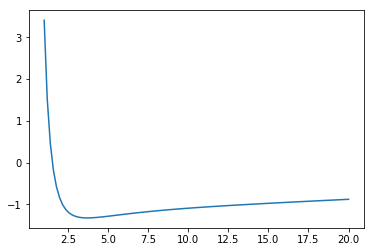

In [132]:
plt.plot(a,gs(a))

In [136]:
from scipy import optimize

value_min = optimize.minimize(gs, [2])

In [42]:
value_min

      fun: -1.3649121322680942
 hess_inv: array([[9.3102933]])
      jac: array([-5.36441803e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([3.47797655])